In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, PolynomialFeatures,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\CO2 Emissions_Canada.csv")

In [4]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

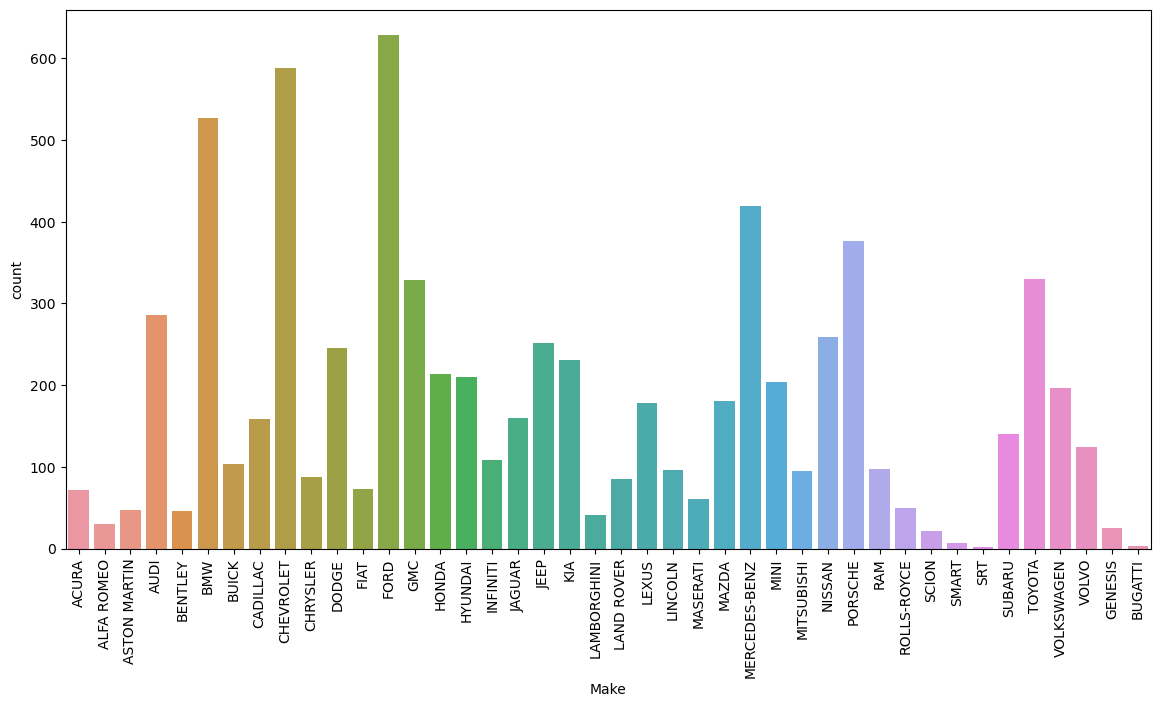

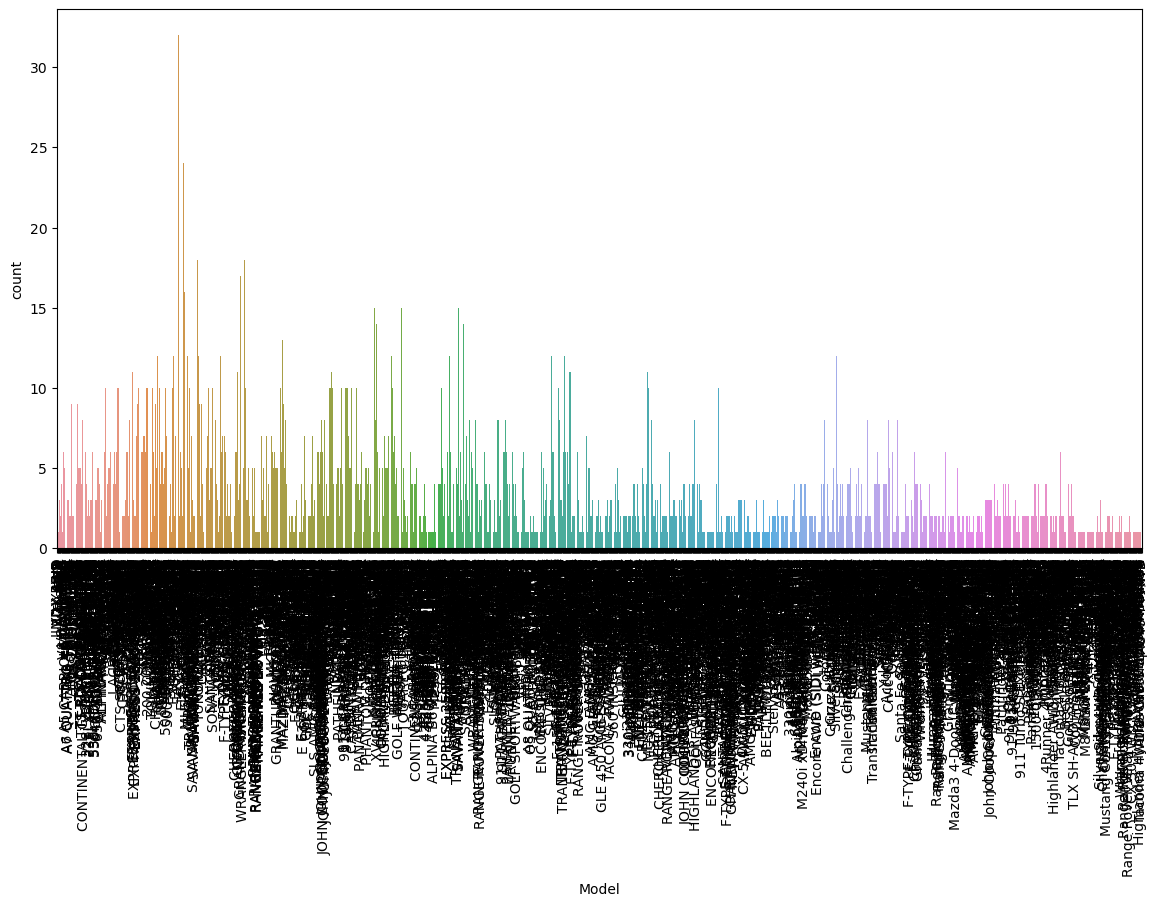

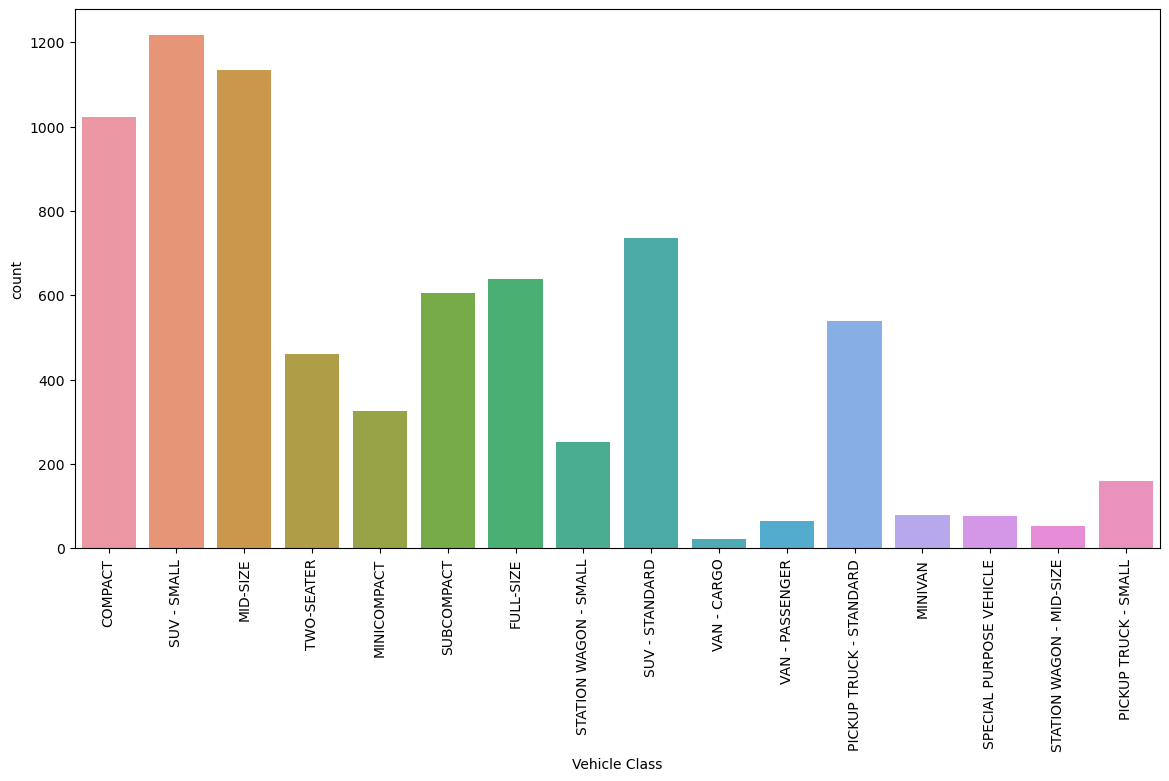

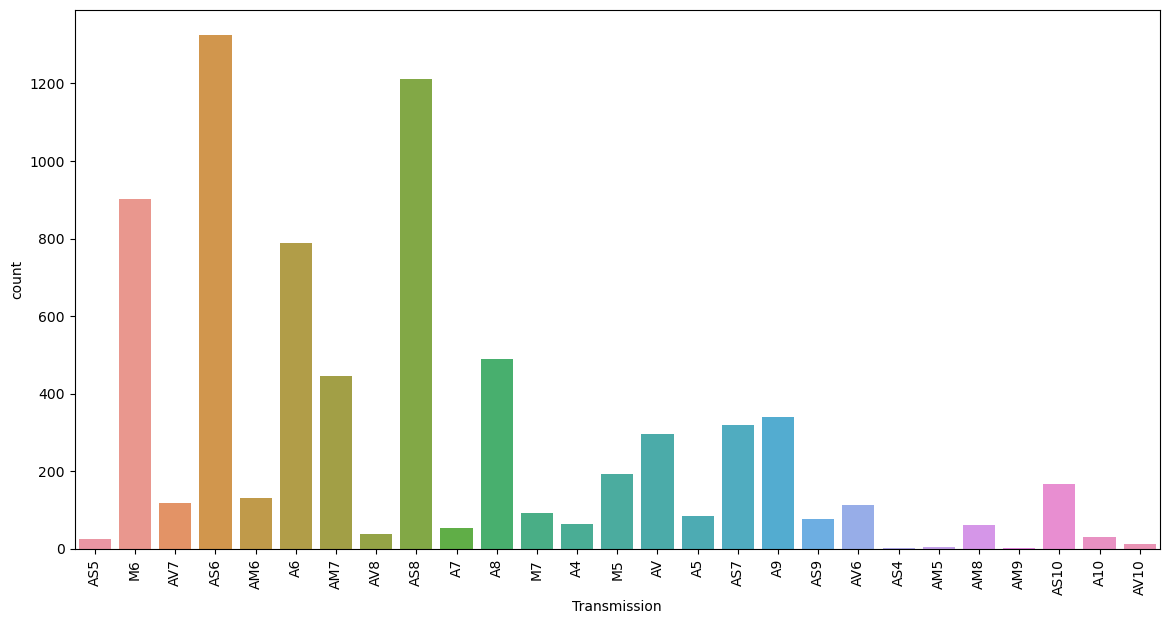

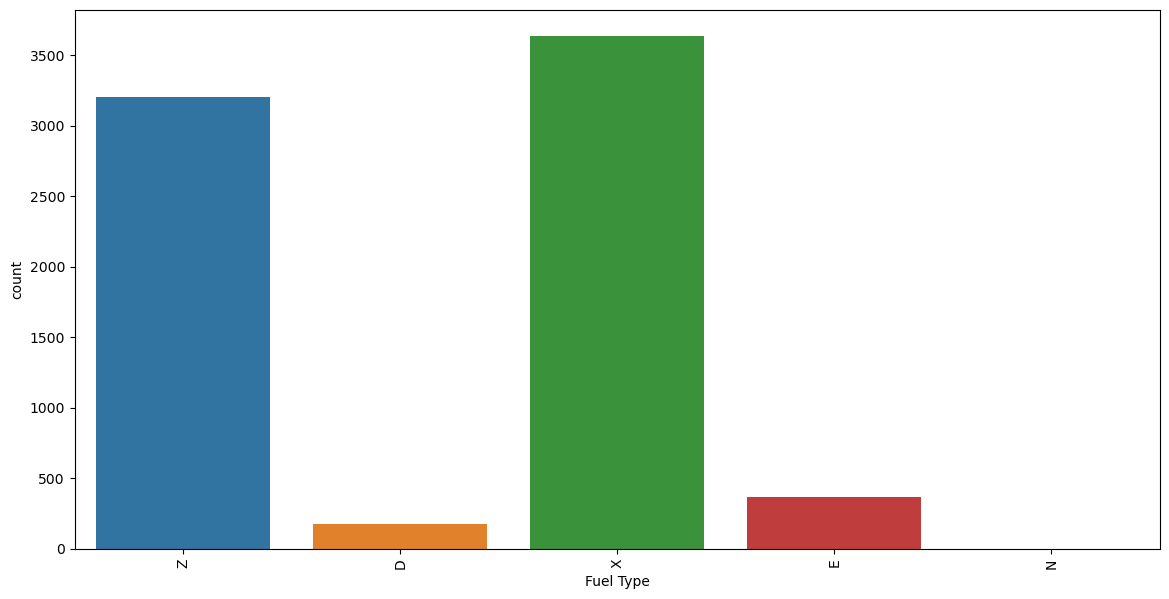

In [13]:
for c in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(14,7))
    sns.countplot(x=df[c])
    plt.xticks(rotation=90)
    plt.show()

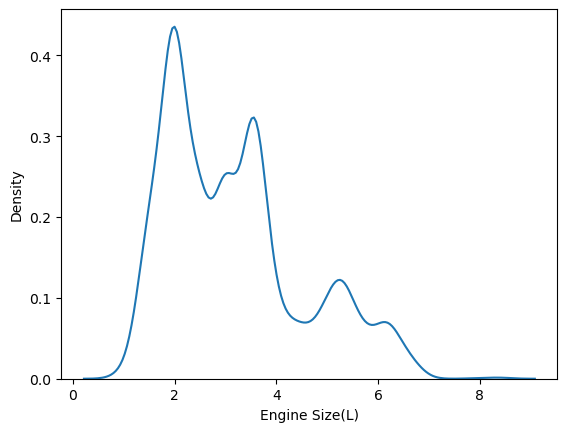

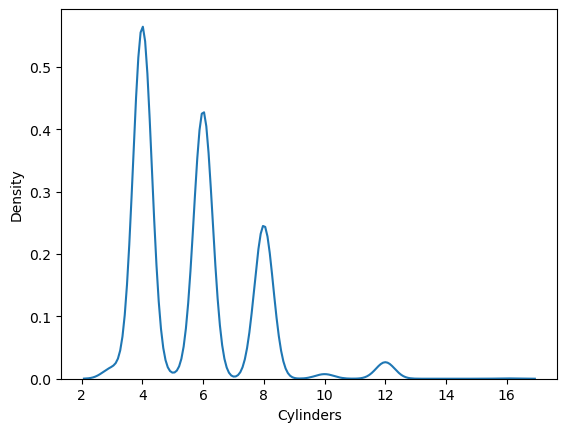

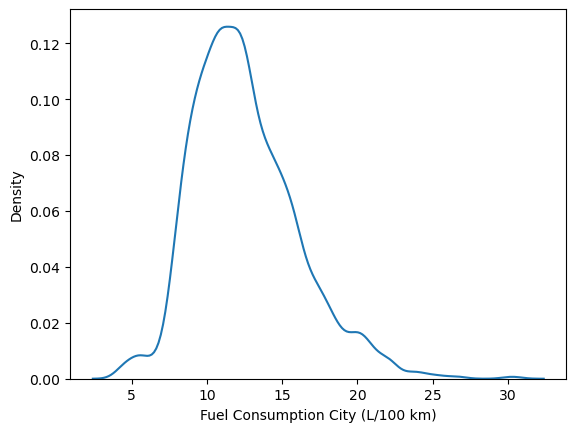

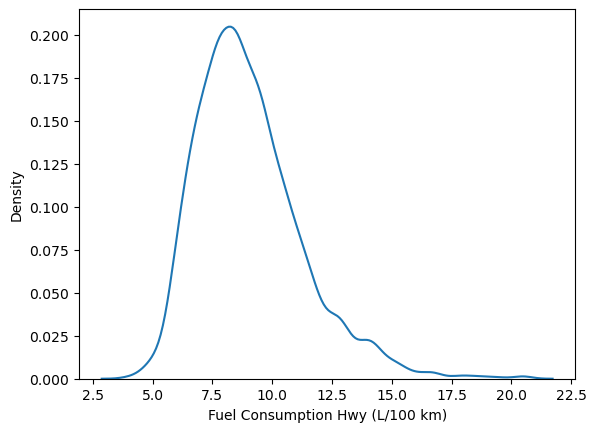

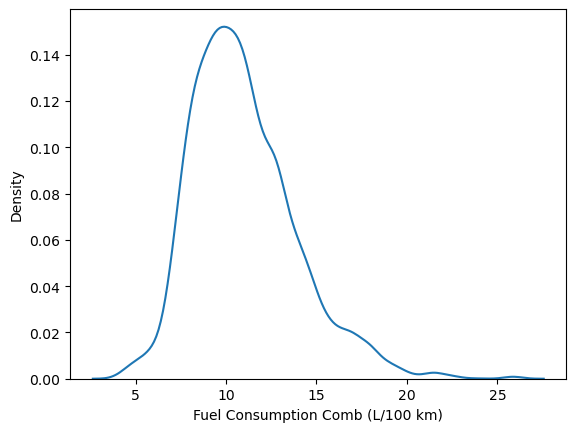

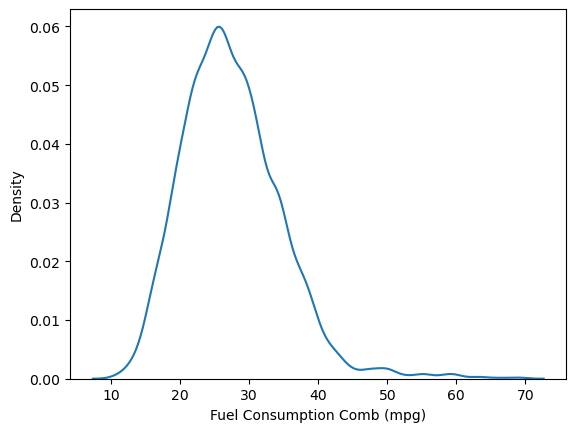

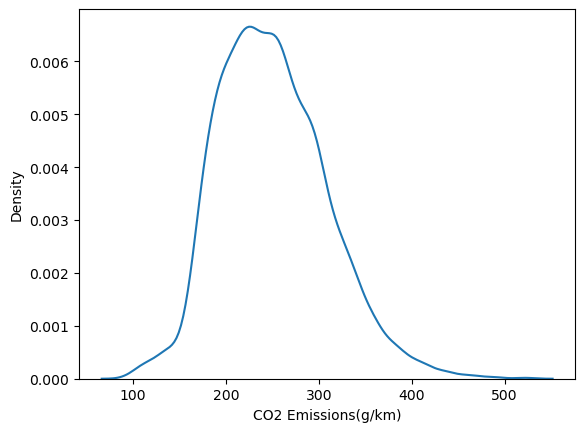

In [18]:
for c in df.select_dtypes(include=["float64","int64"]).columns:
    sns.kdeplot(x=df[c])
    plt.show()

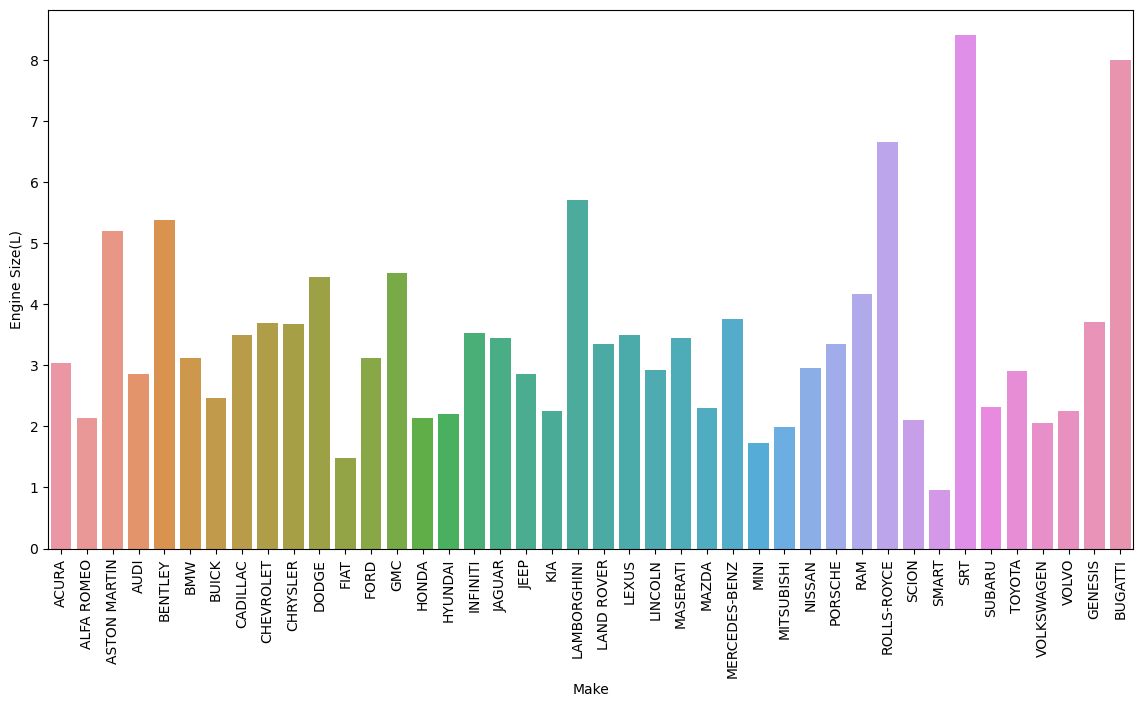

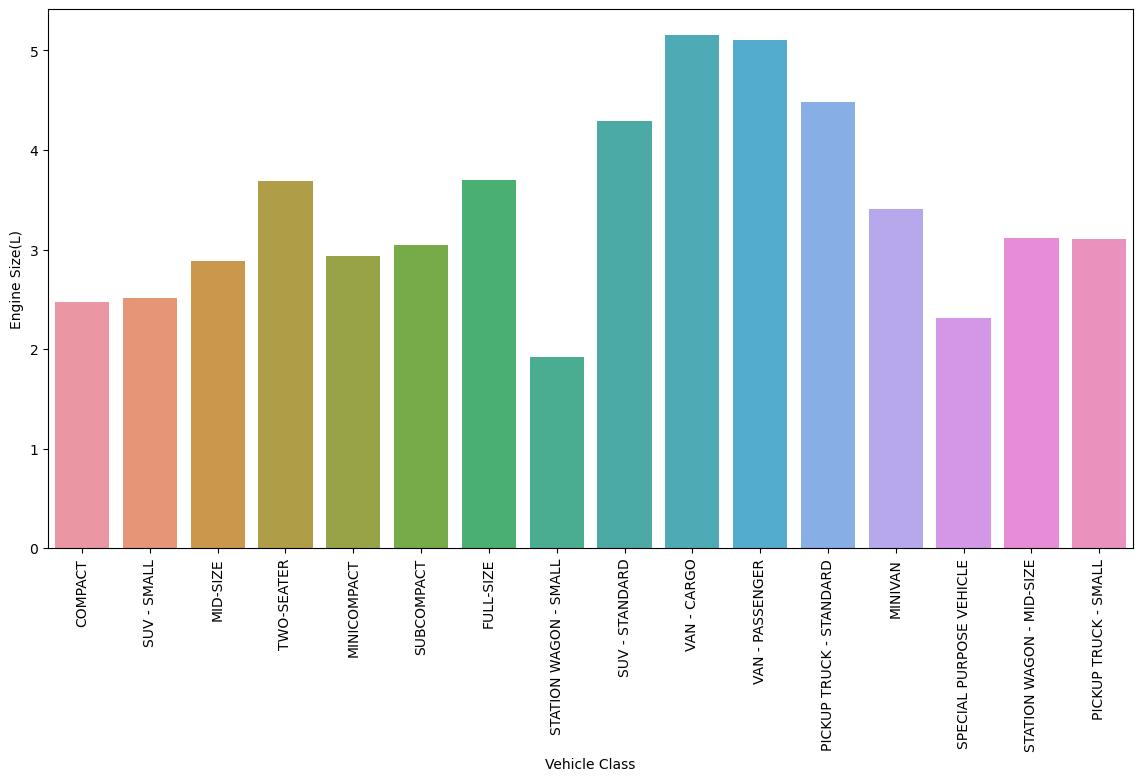

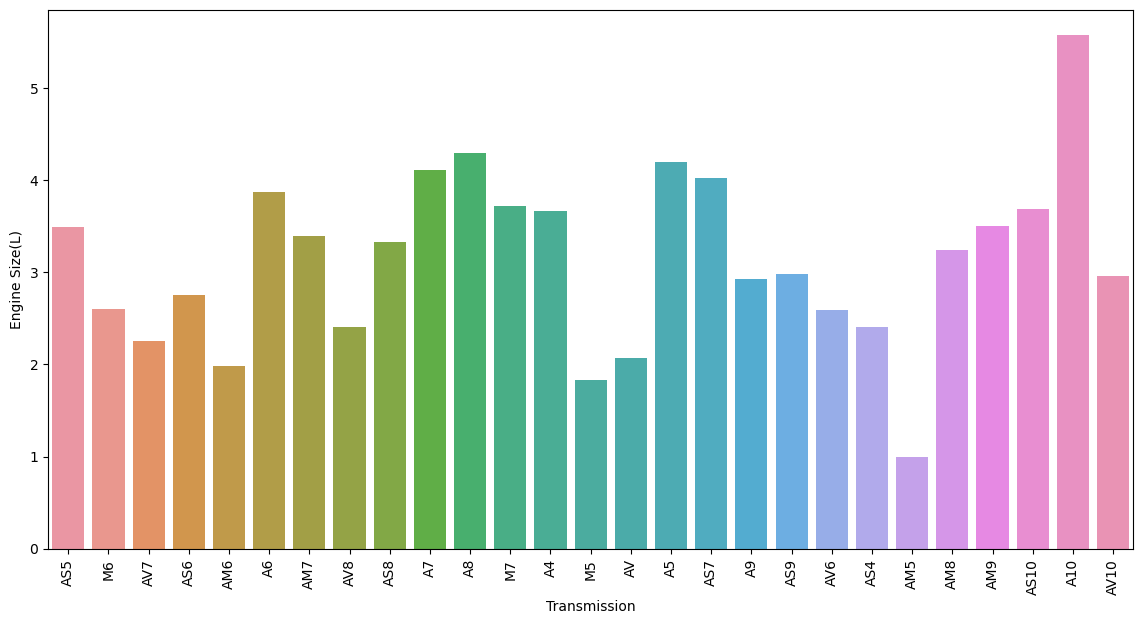

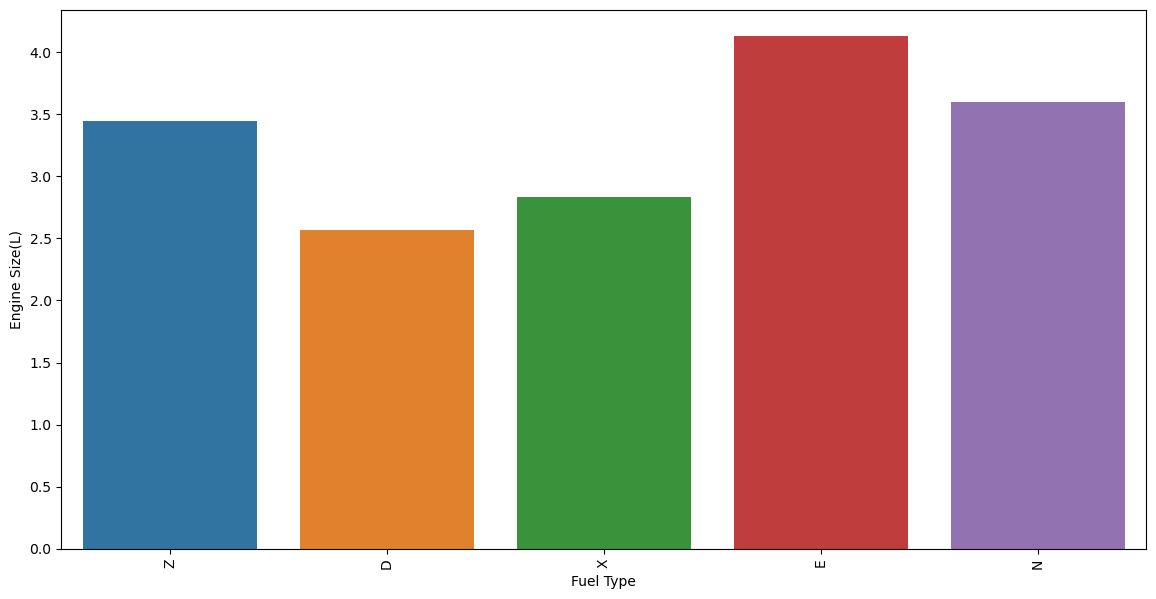

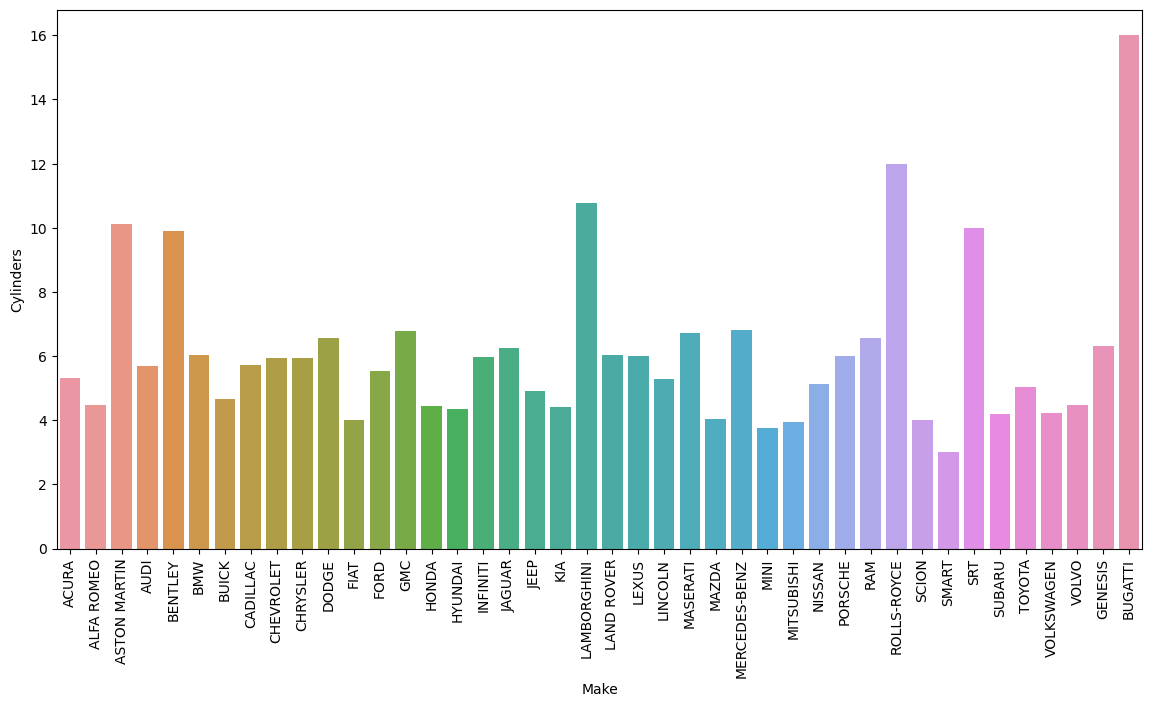

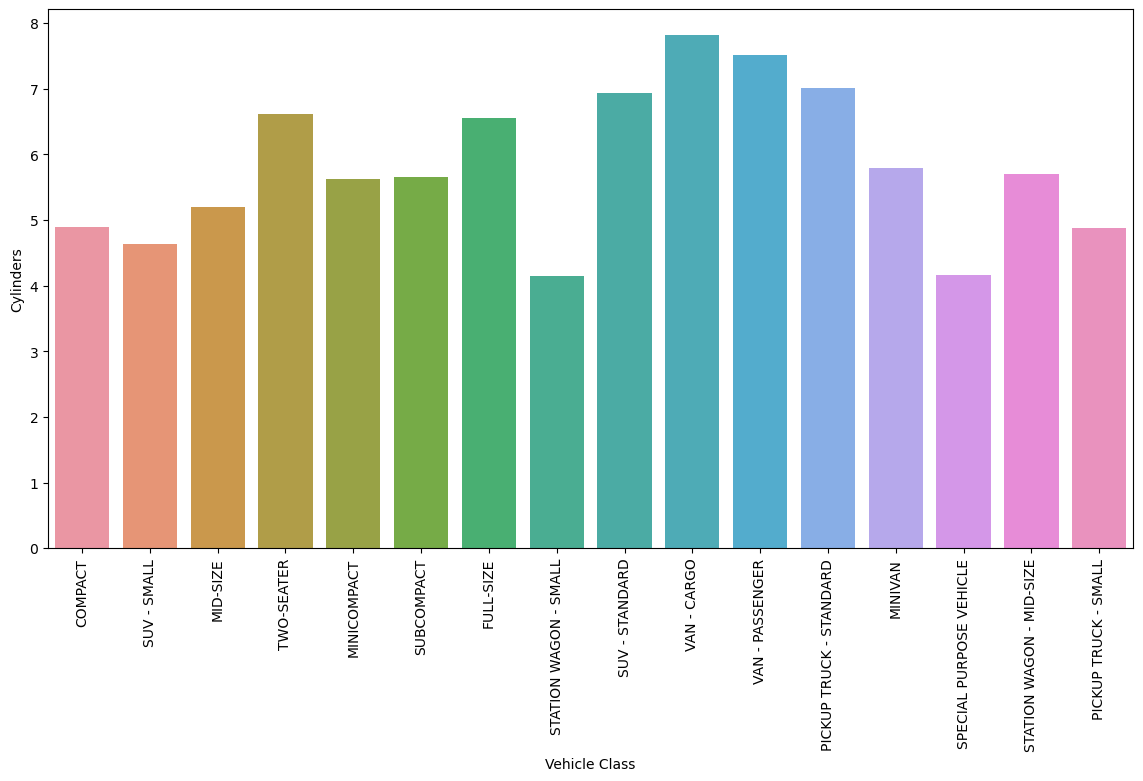

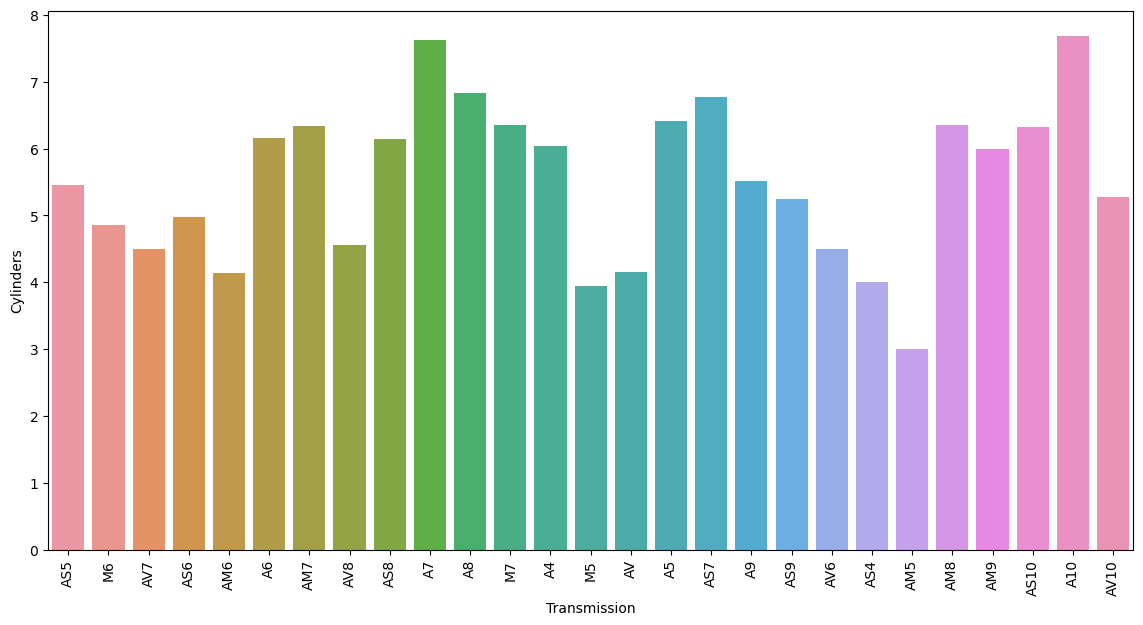

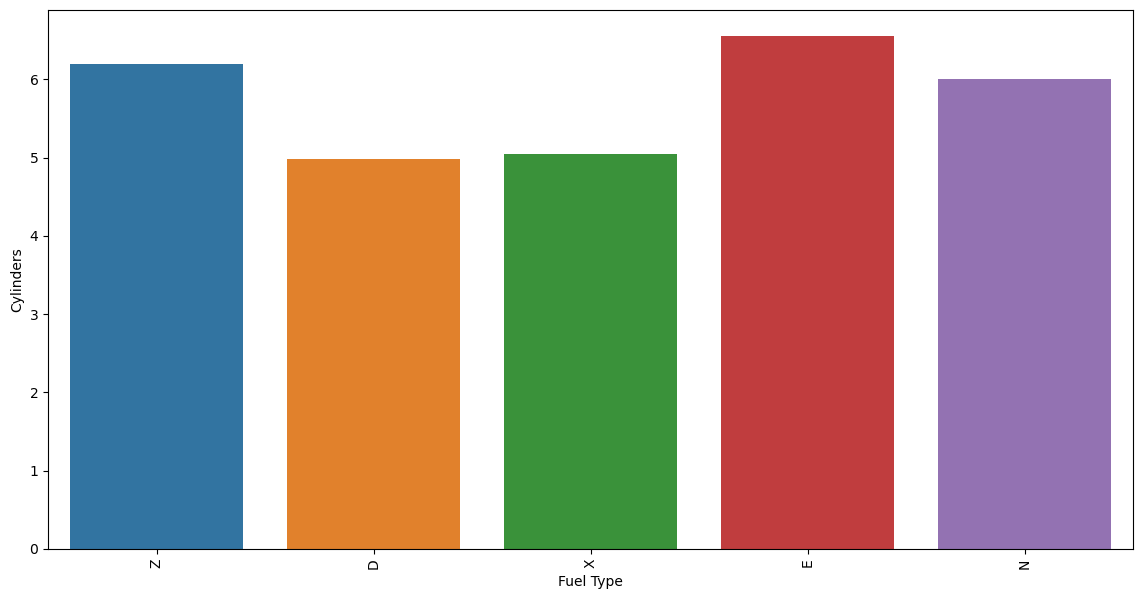

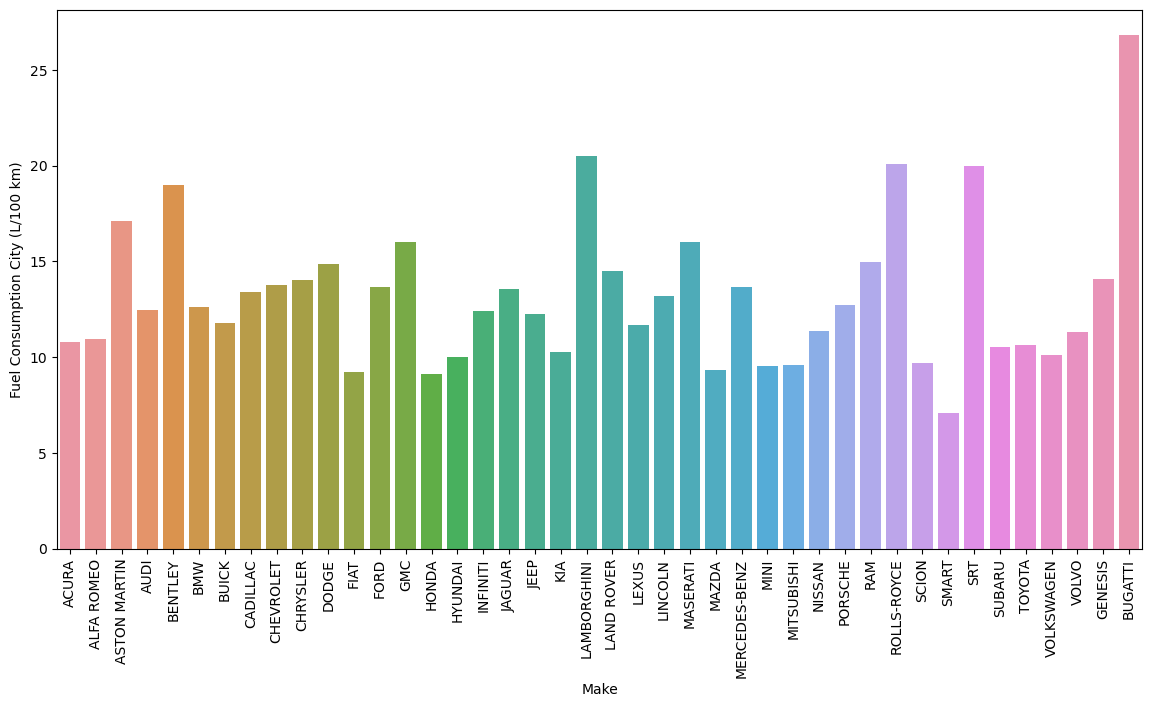

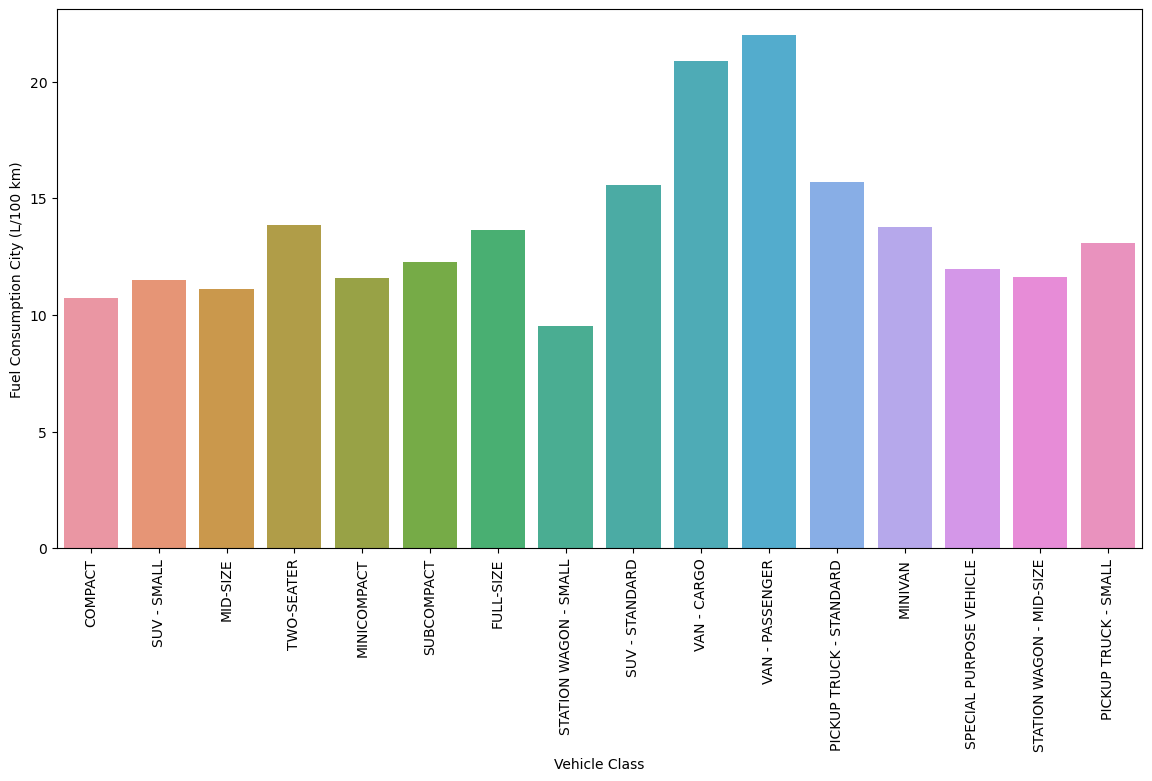

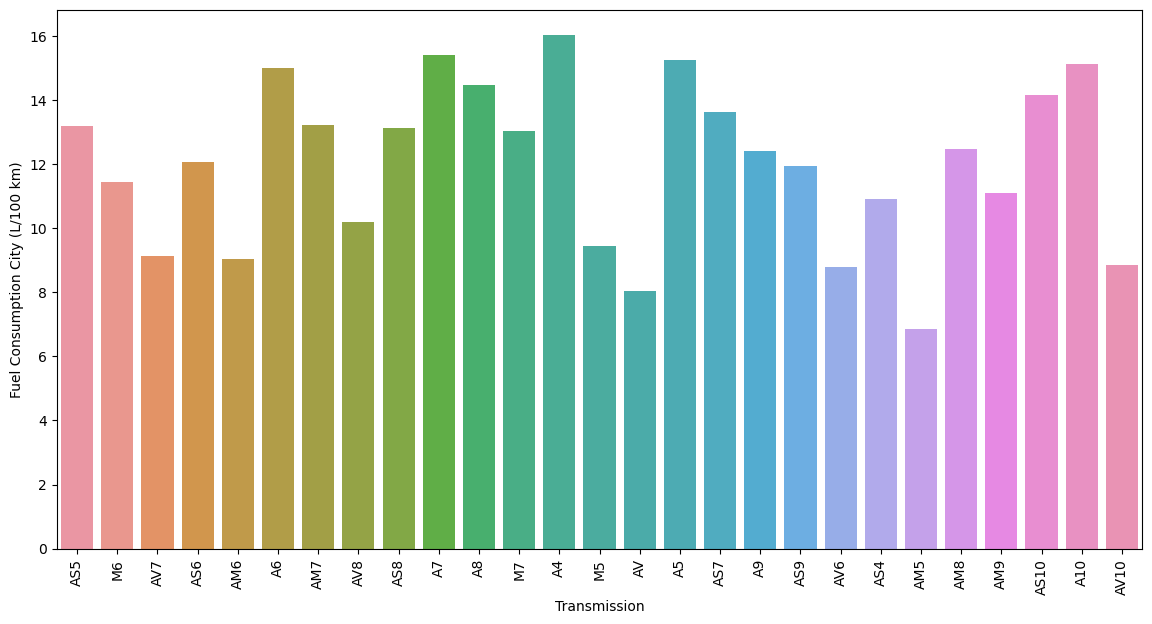

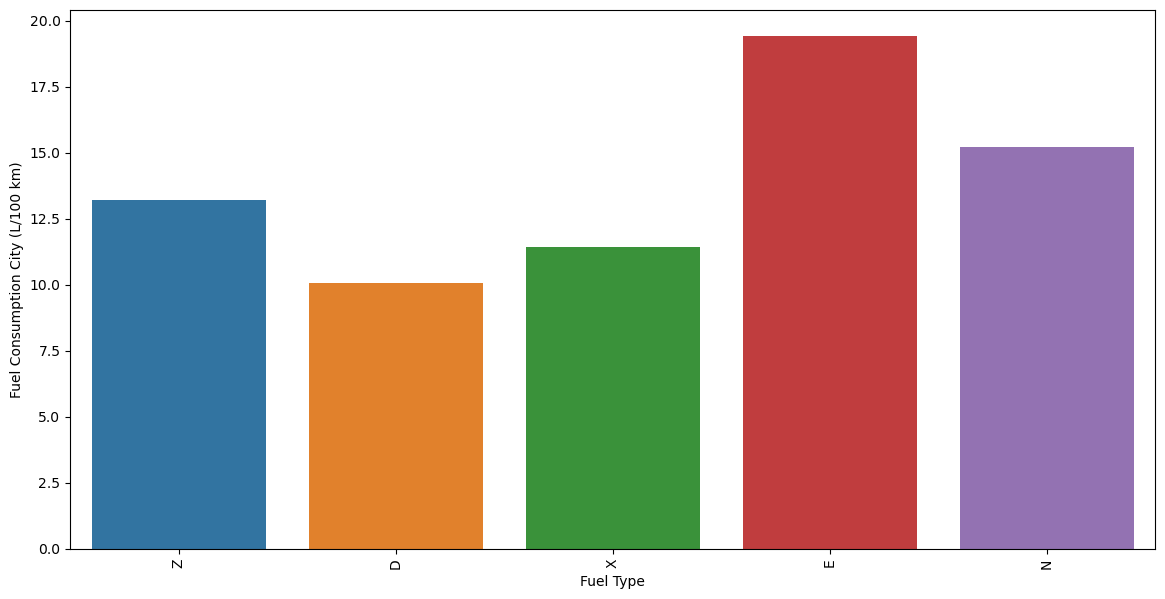

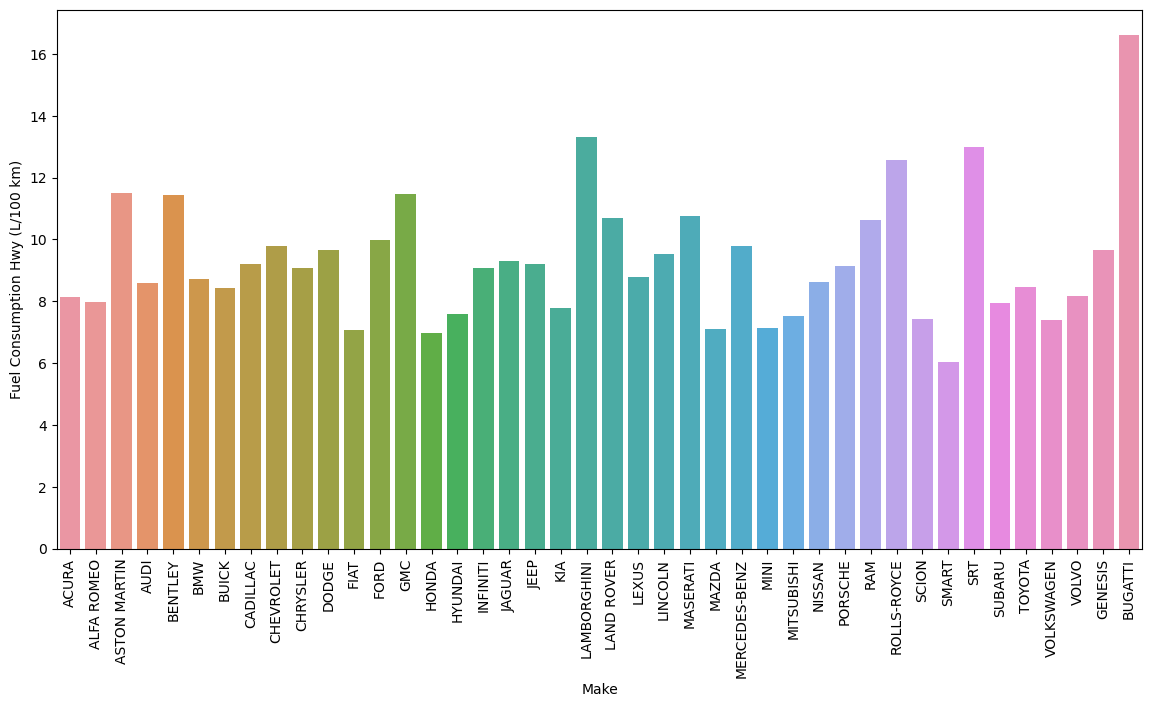

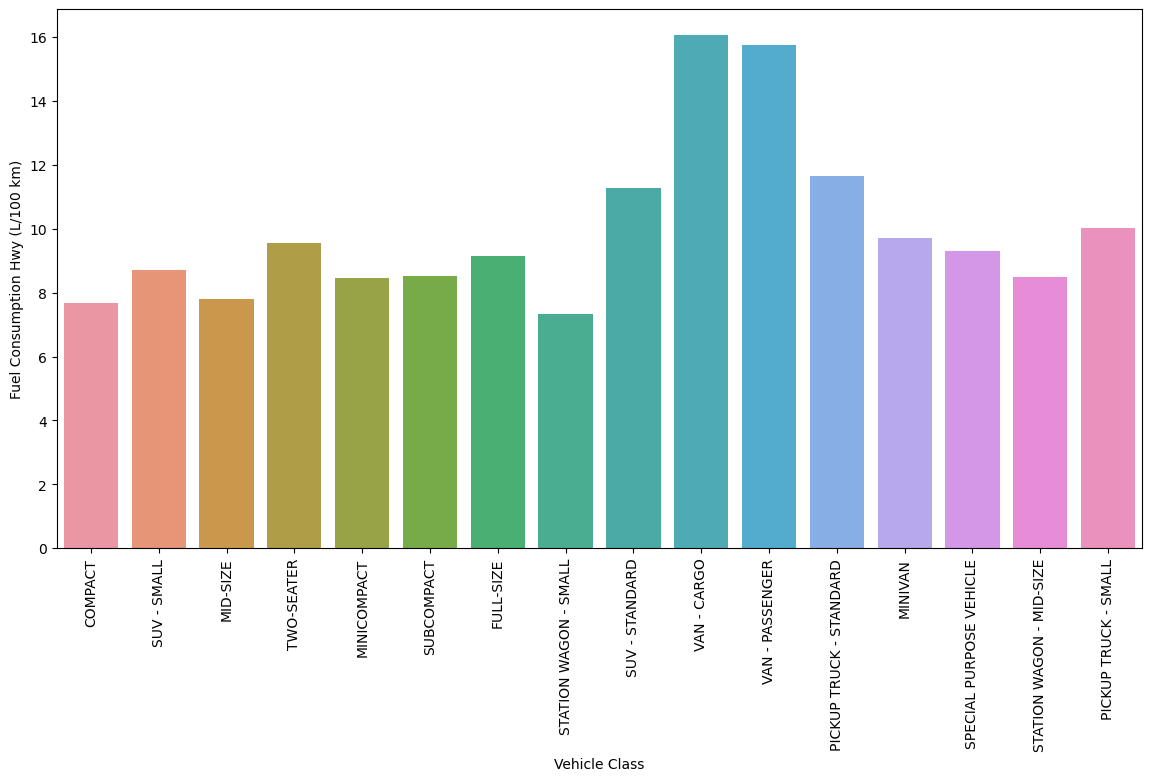

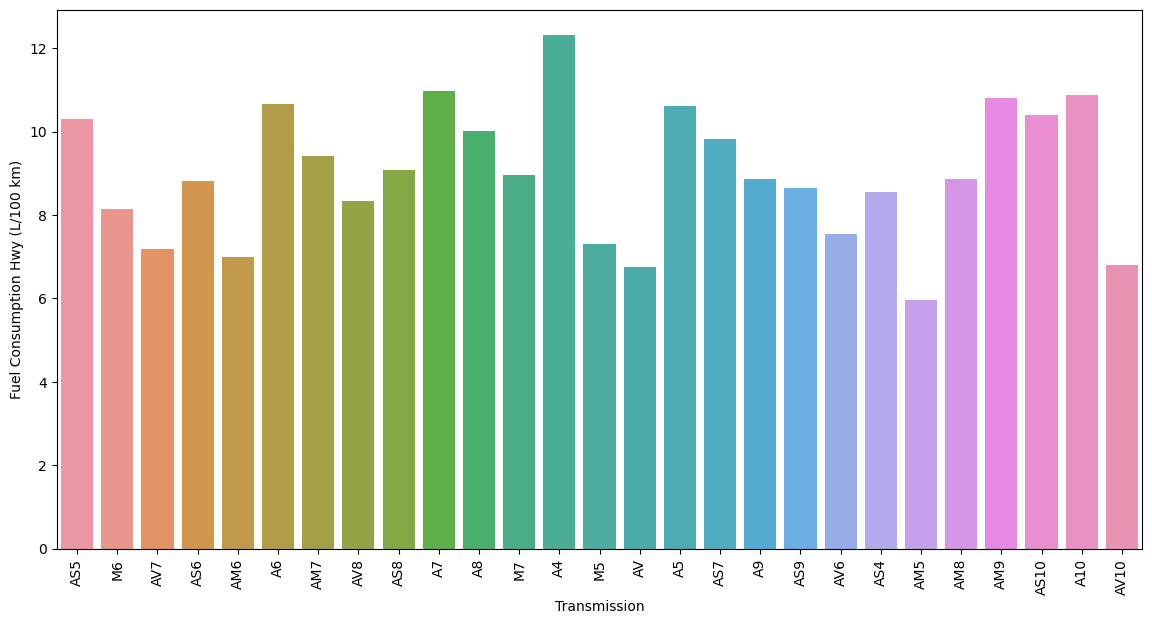

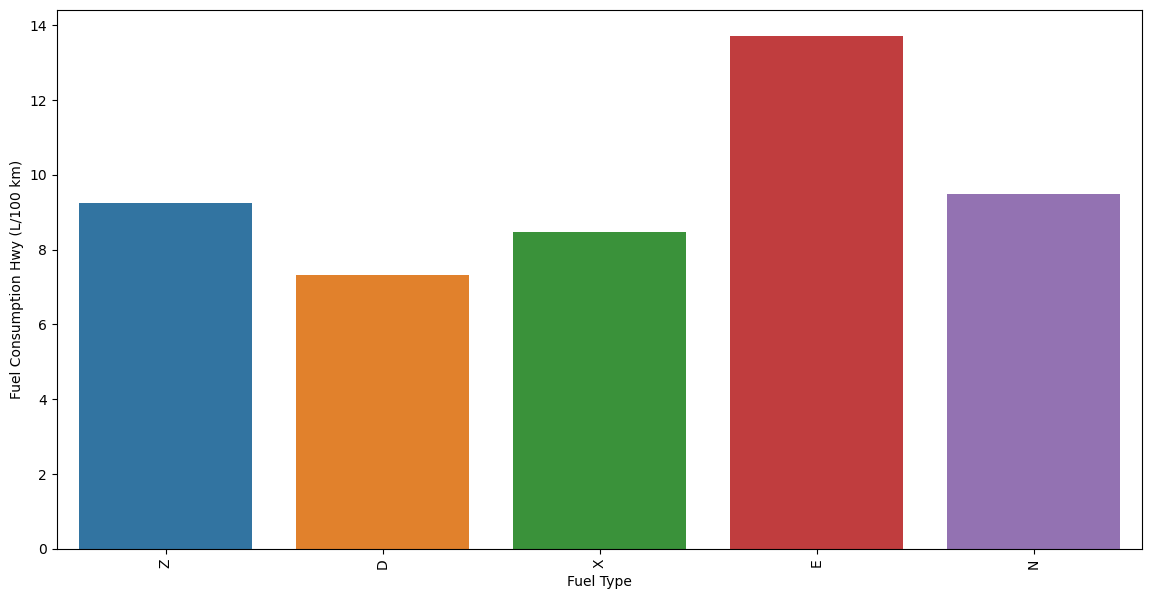

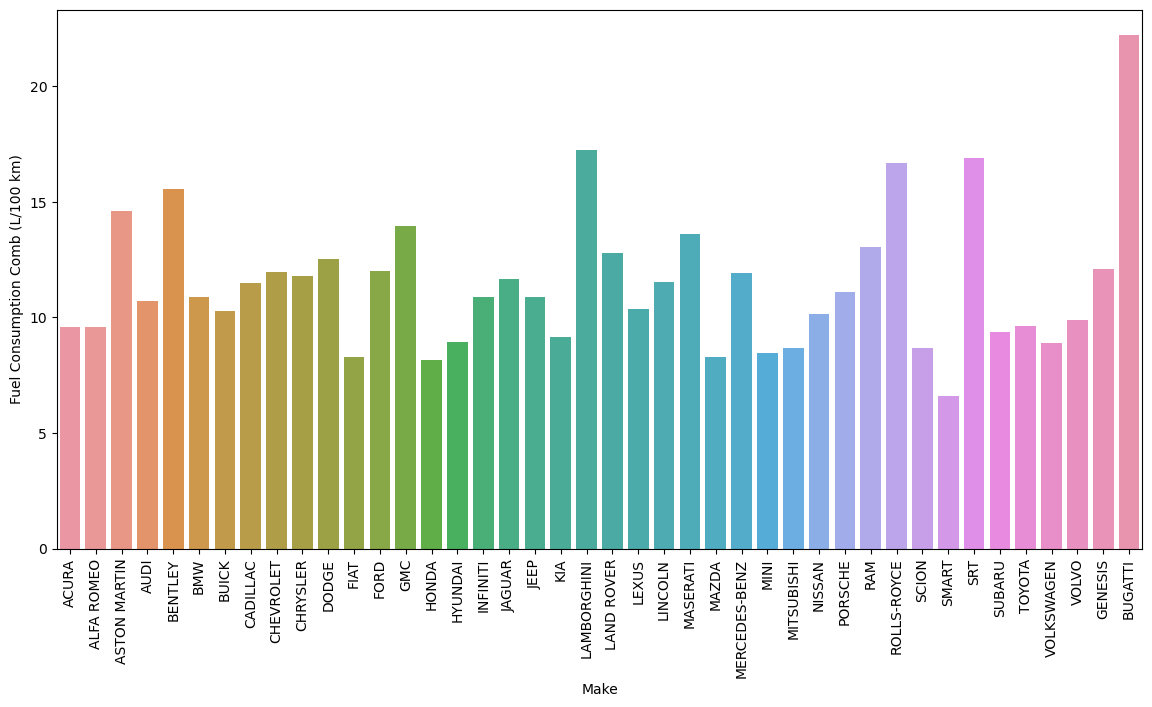

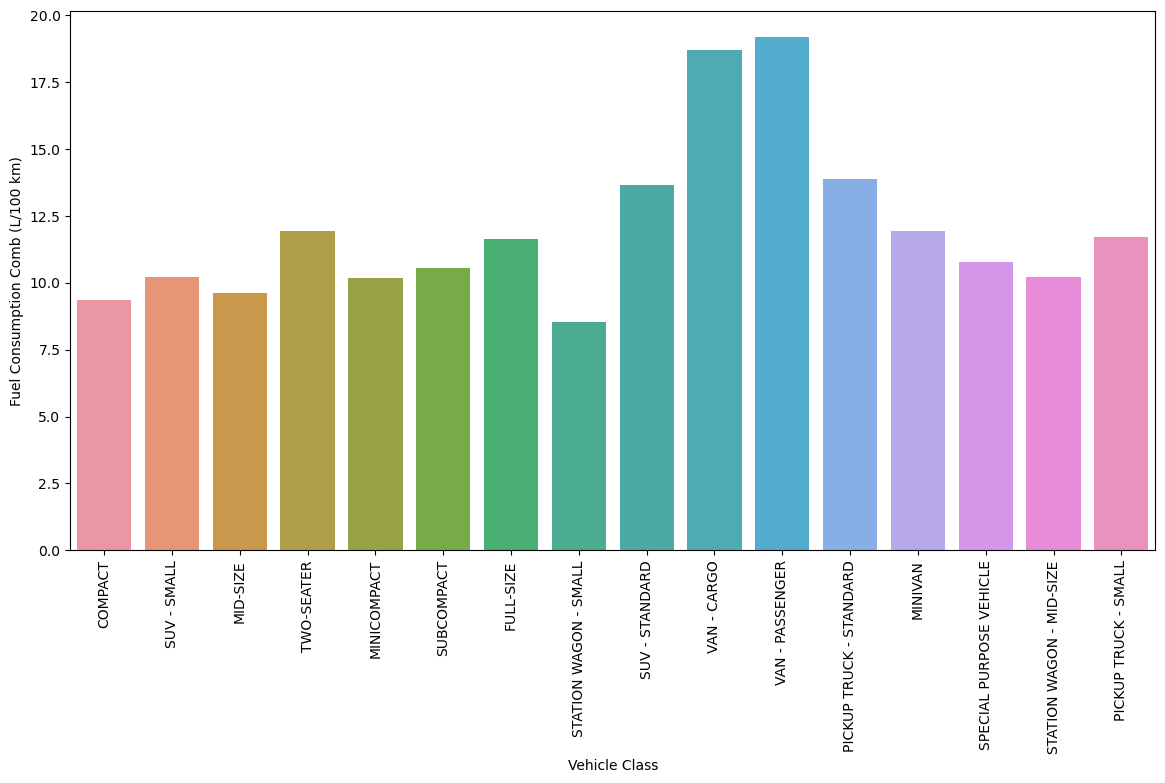

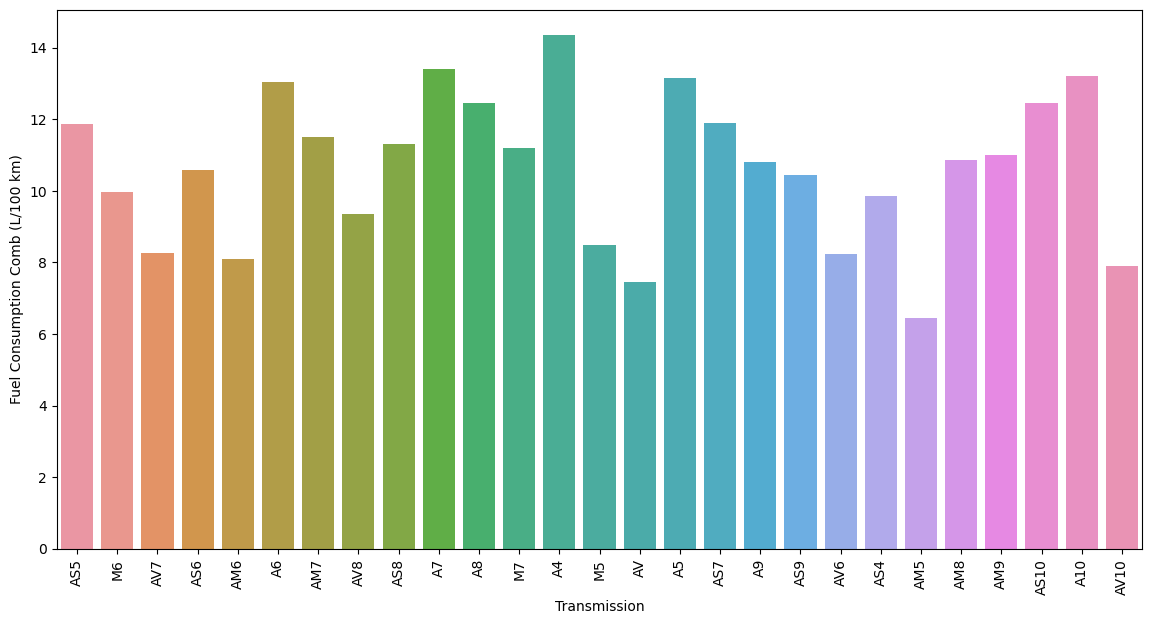

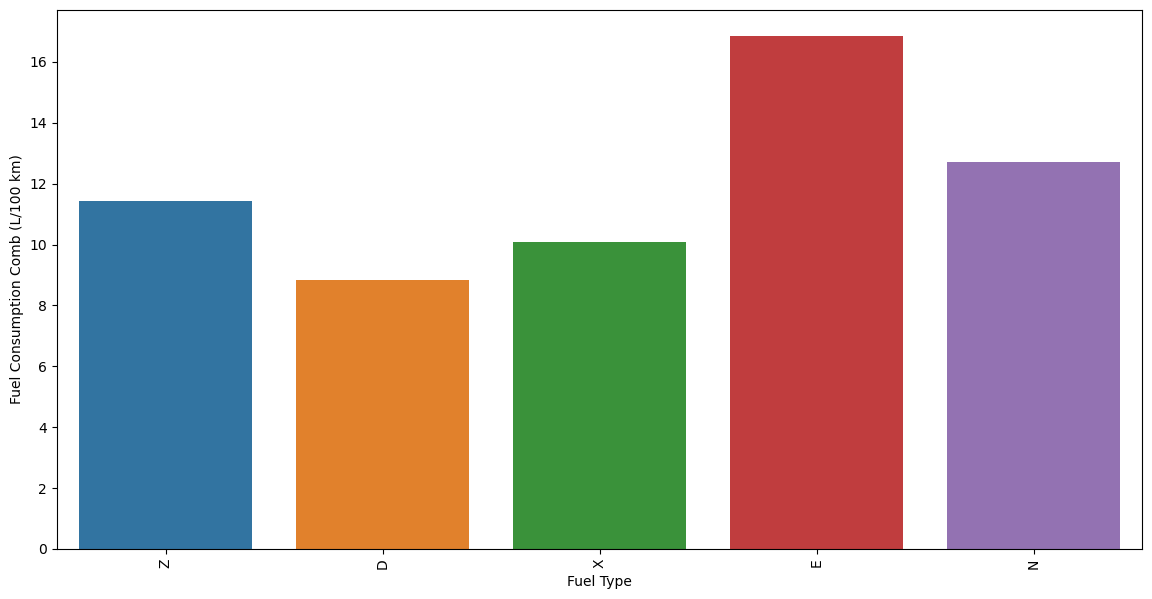

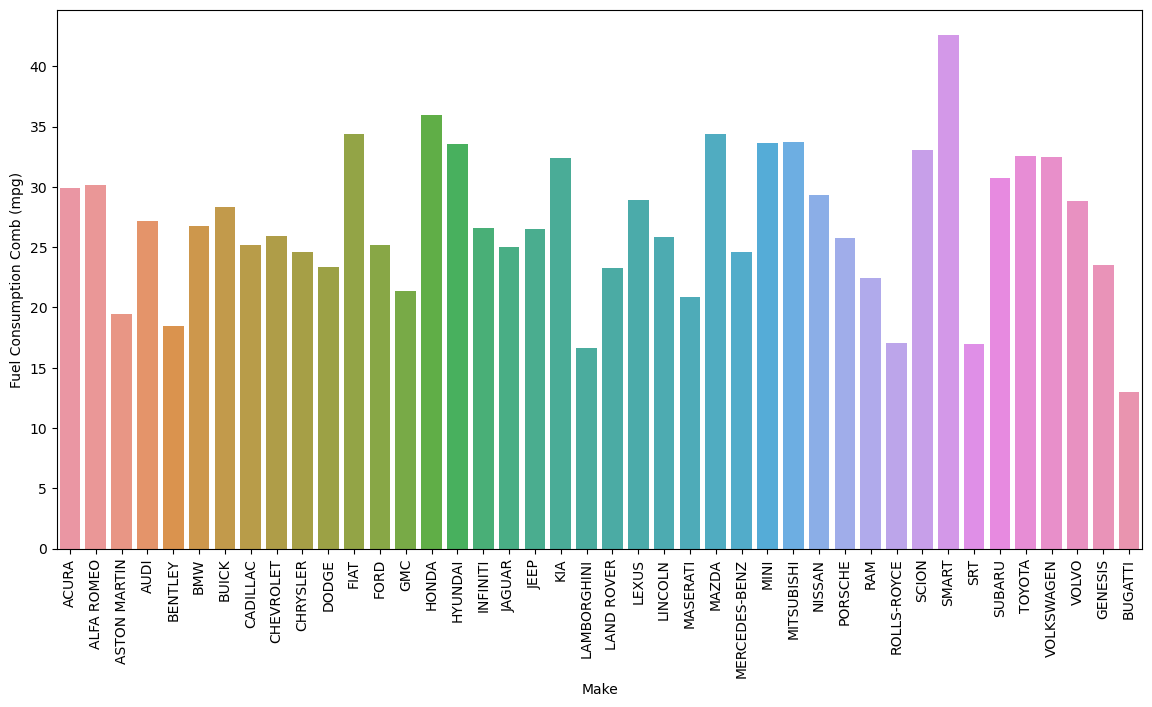

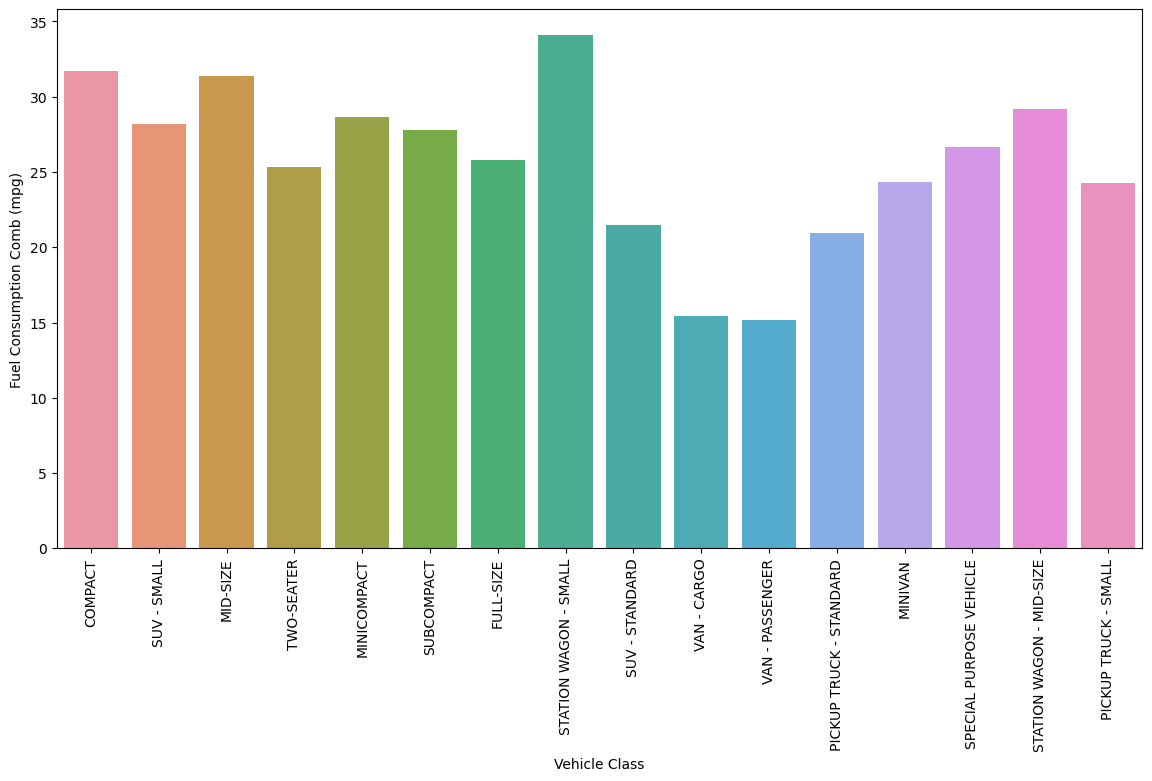

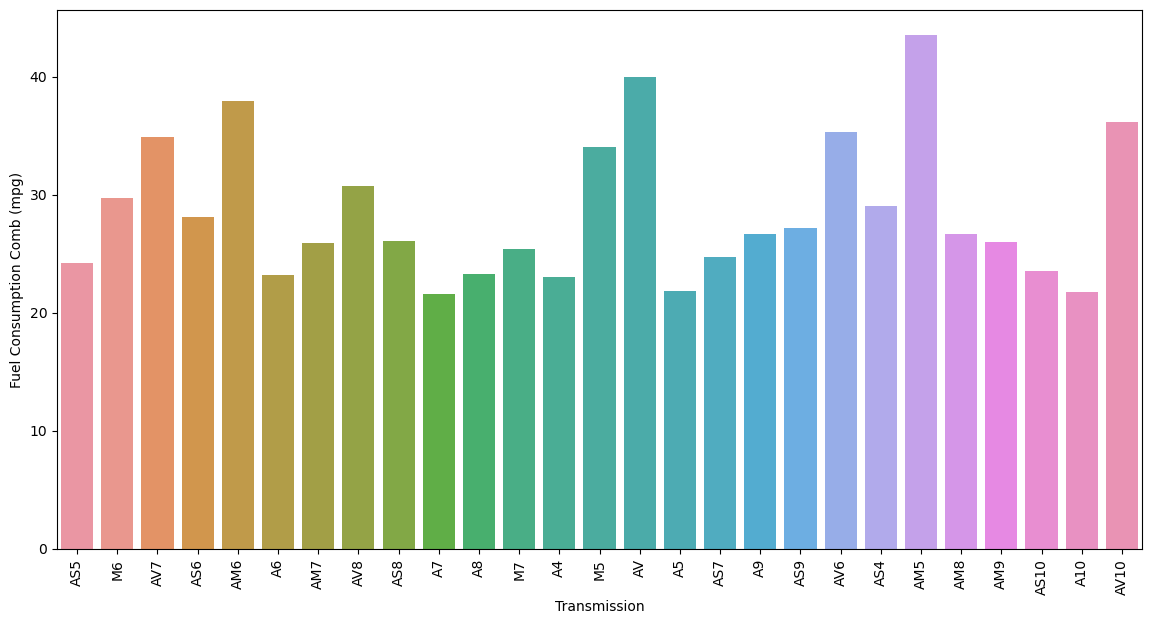

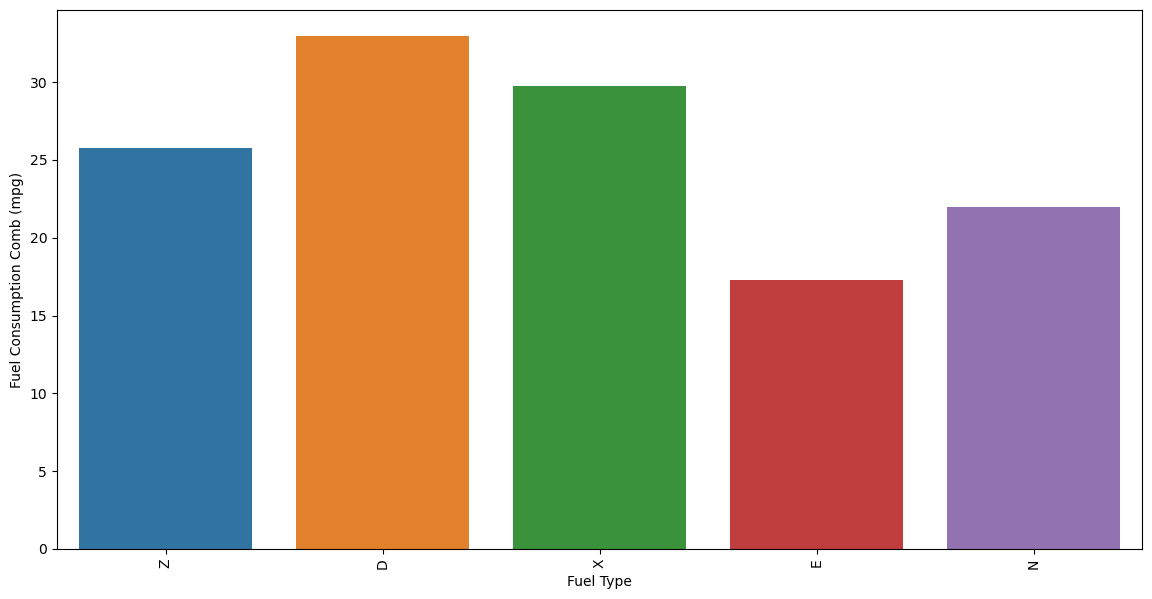

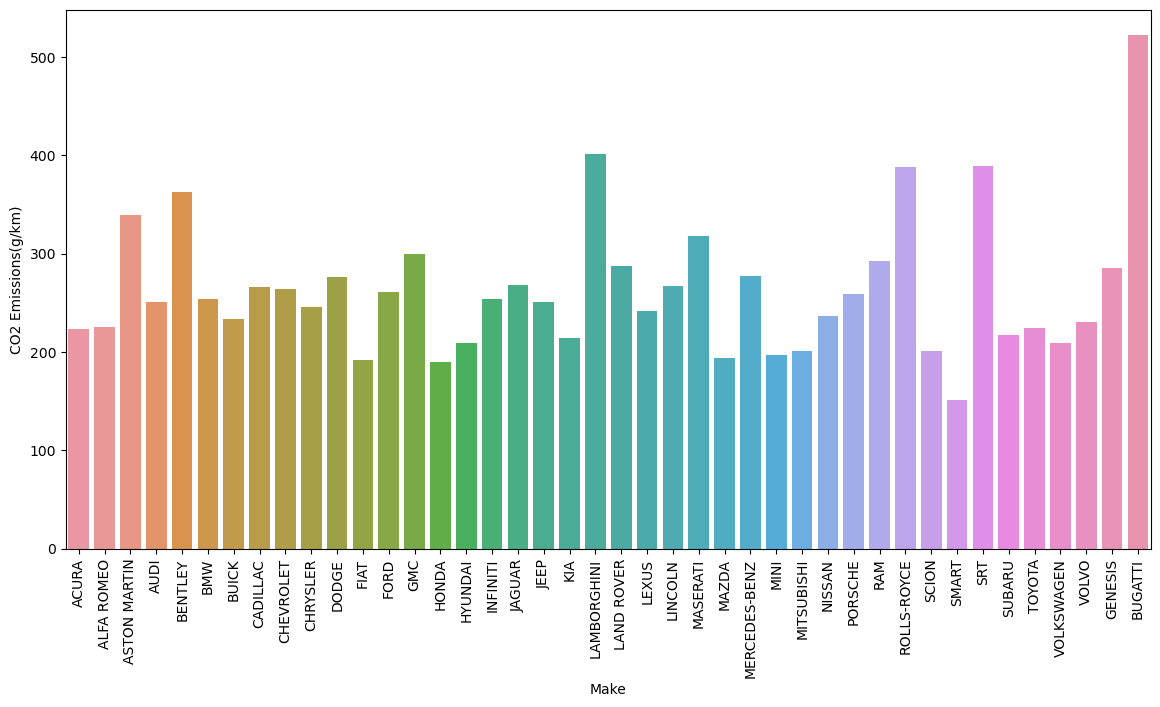

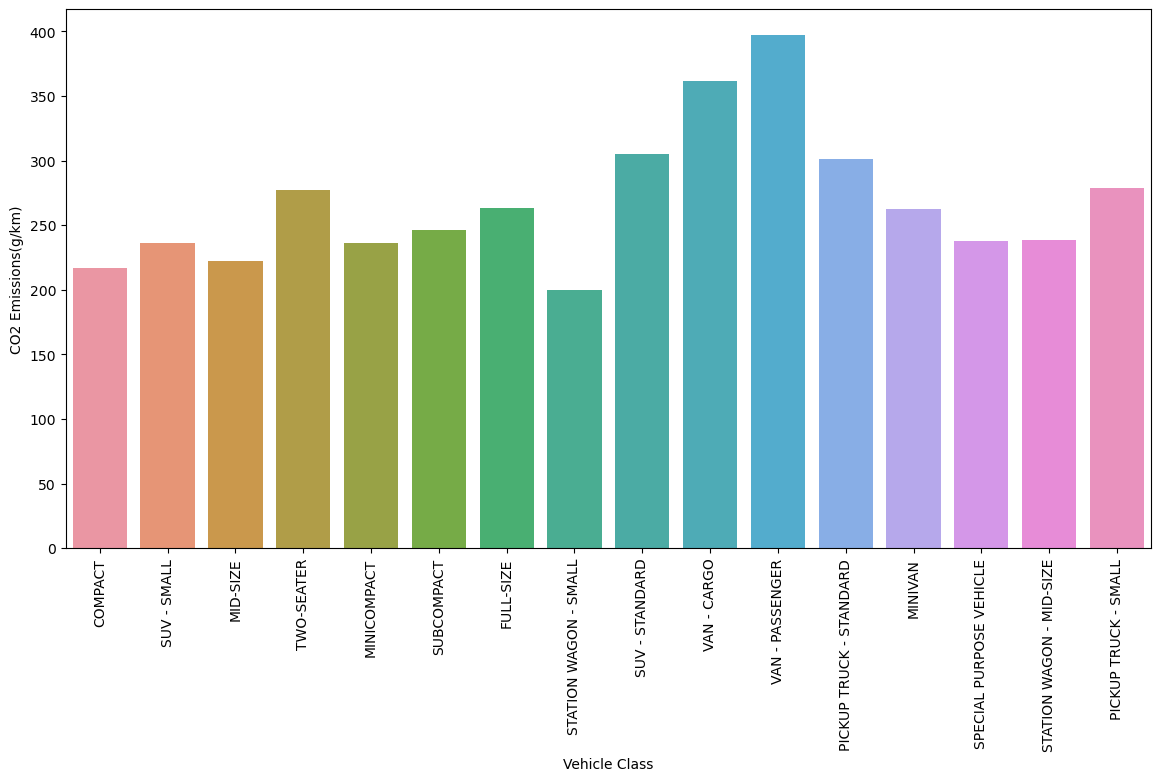

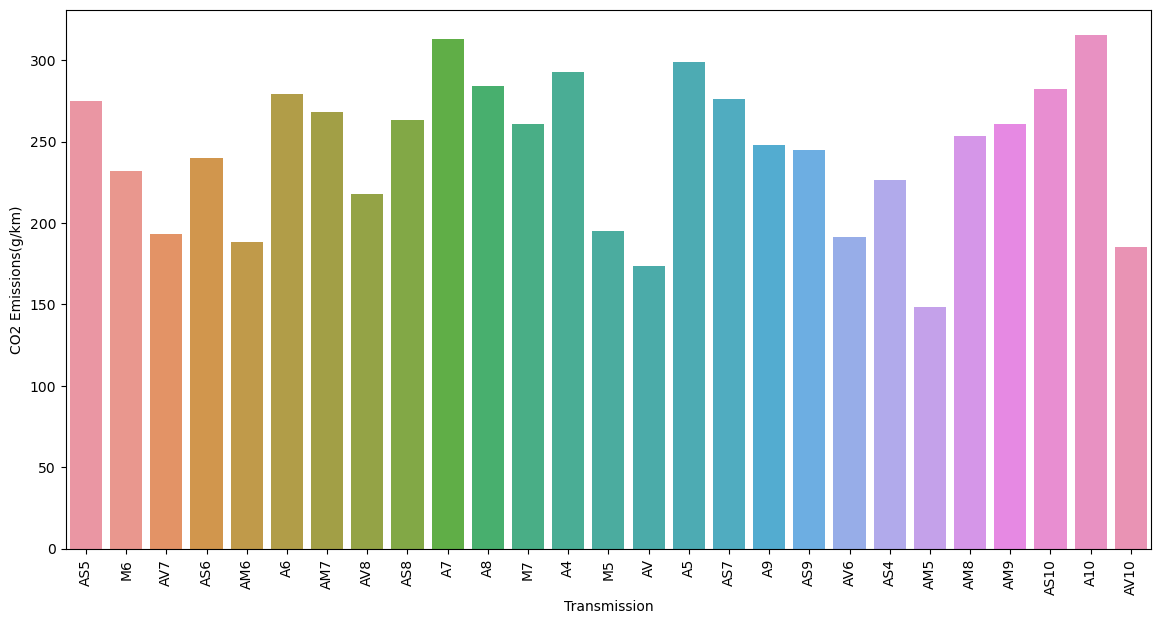

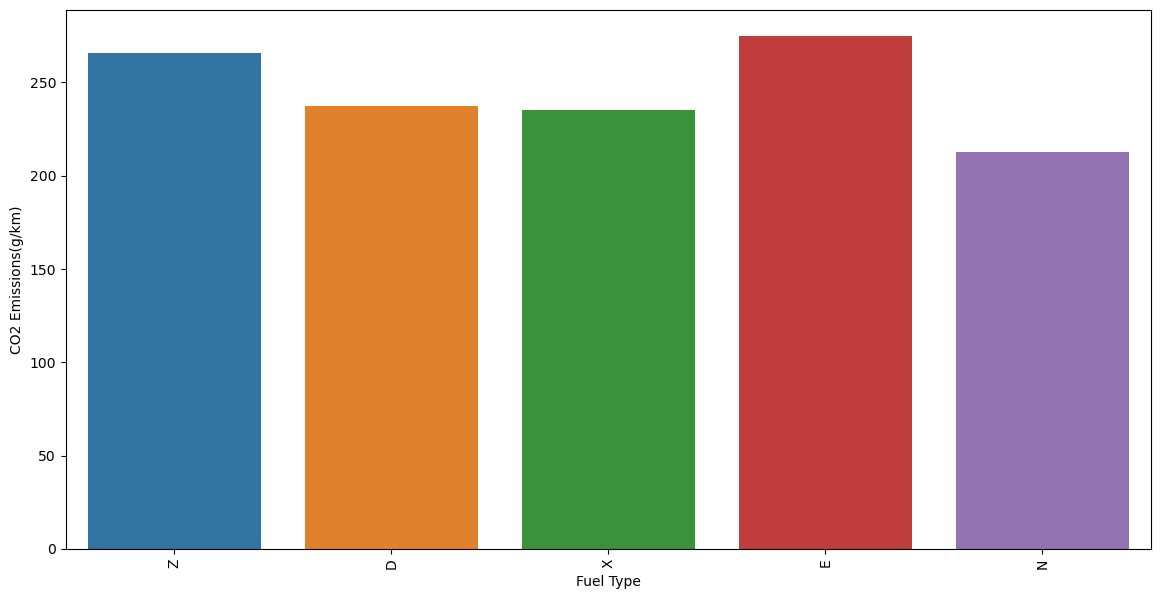

In [21]:
for c in df.select_dtypes(include=["float64","int64"]).columns:
    for c1 in df.select_dtypes(include="object").columns:
        if c1!="Model":
            plt.figure(figsize=(14,7))
            plt.xticks(rotation=90)
            sns.barplot(data=df,x=c1,y=c,errorbar=None)
            plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

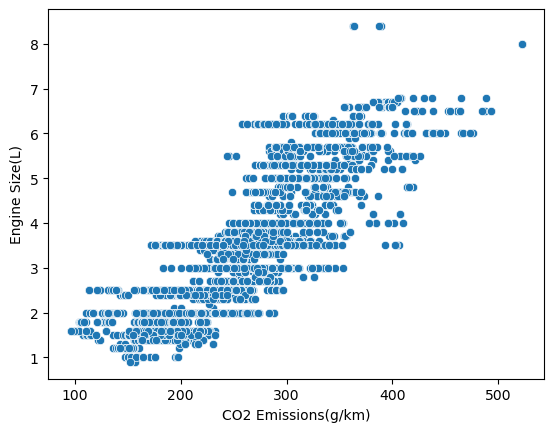

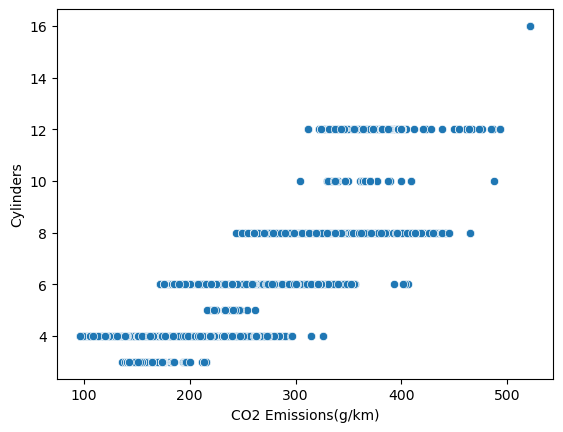

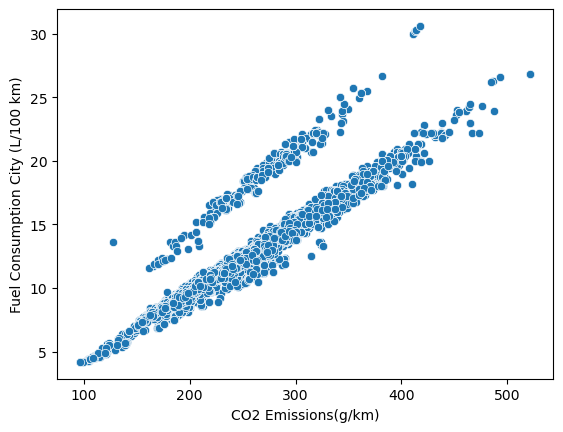

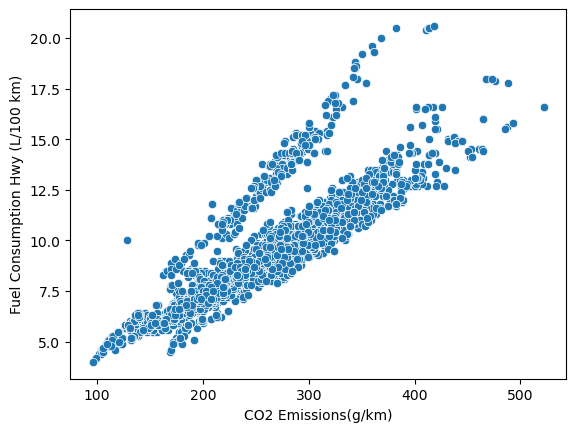

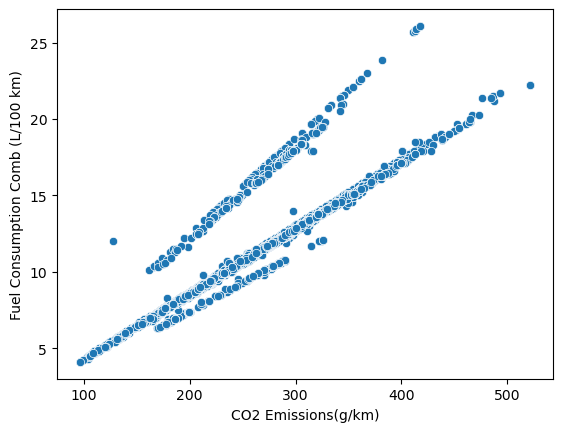

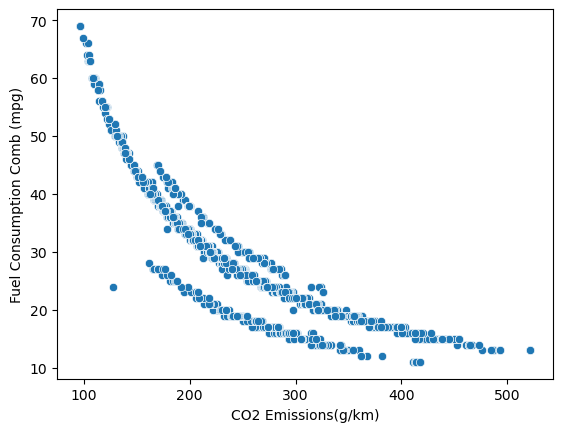

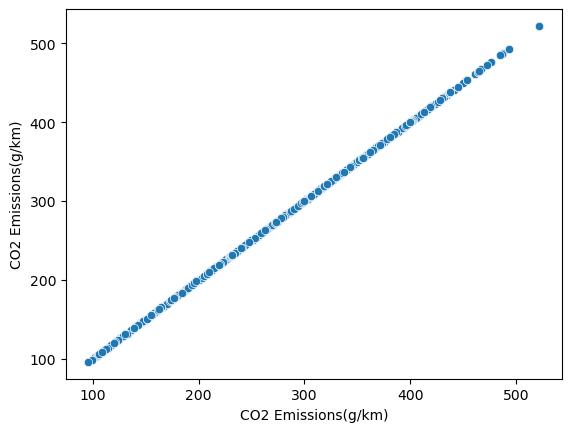

In [66]:
for c1 in df.select_dtypes(include=["float64","int64"]).columns:
    sns.scatterplot(df,x="CO2 Emissions(g/km)",y=c1)
    plt.show()

In [26]:
df.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8968\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# feature selection

In [3]:
df_sel = df[['Make', 'Model','Vehicle Class', 'Transmission','Fuel Type', 'Engine Size(L)', 'Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]

In [61]:
df_sel

,Make,Model,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,2.0,4,8.5,196
1,ACURA,ILX,COMPACT,M6,Z,2.4,4,9.6,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,1.5,4,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,3.5,6,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,3.5,6,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,2.0,4,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,2.0,4,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,2.0,4,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,2.0,4,9.9,232


# Pre processing

In [16]:
fv = df_sel.drop(columns=["CO2 Emissions(g/km)"])
cv = df_sel["CO2 Emissions(g/km)"]

In [17]:
numeric_features = fv.select_dtypes(include=['float64', 'int64']).columns
categorical_features = fv.select_dtypes(include=['object']).columns

In [18]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'))])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object'))])

In [20]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [21]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,random_state=7)

In [22]:
x_trainp = pipeline.fit_transform(x_train)
x_testp = pipeline.transform(x_test)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [23]:
lr = LinearRegression()
model = lr.fit(x_trainp,y_train)
pred = model.predict(x_testp)
r2 = r2_score(y_test,pred)

In [14]:
r2

-2.665654709737989e+16

# training and evaluation

# knn

In [52]:
knn_regressor = KNeighborsRegressor()

In [53]:
param_grid = {'n_neighbors': [3, 5, 7, 9],  'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [54]:
gsv = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring="r2")

In [55]:
gsv.fit(x_trainp,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [68]:
knnT_r2 = gsv.best_score_
knnT_r2

0.9809600022630829

In [57]:
gsv.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

# training

In [88]:
knnr1 = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=1)
modelk = knnr1.fit(x_trainp,y_train)
predkkn1 = modelk.predict(x_trainp)
knnTe_r2_train = r2_score(y_train,predkkn1)
knn_mean2error_train  = mean_squared_error(y_train,predkkn1)

In [89]:
knnTe_r2_train

0.984785232320926

In [90]:
knn_mean2error_train

52.24864590385918

# testing

In [25]:
knnr = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=1)
modelk = knnr.fit(x_trainp,y_train)
predkkn = modelk.predict(x_testp)
knnTe_r2 = r2_score(y_test,predkkn)
knn_mean2error  = mean_squared_error(y_test,predkkn)
knnTe_r2

0.9711306337368704

In [74]:
knn_mean2error

97.57838862559241

Text(0.5, 1.0, 'Train vs Test r2')

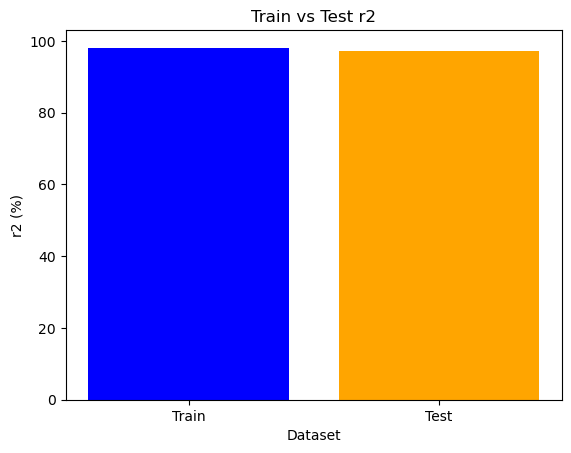

In [69]:
data = {
    'r2': [knnT_r2*100, knnTe_r2*100],
    'Dataset': ['Train', 'Test']
}

# Create a DataFrame
df1 = pd.DataFrame(data)
plt.bar(df1['Dataset'], df1['r2'], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('r2 (%)')
plt.title('Train vs Test r2')

# linear regression

In [18]:
sgd=SGDRegressor(loss='squared_error',random_state=7)

In [22]:
param_grid = {
    'penalty': ['l2',"l1","elasticnet"],
    'alpha': [0.0001, 0.001, 0.01,0.1, 1.0, 10.0],
    'learning_rate': ['optimal'],
    }

In [23]:
gsvlg = GridSearchCV(sgd,param_grid,cv=5,scoring='r2',return_train_score=True)

In [24]:
gsvlg.fit(x_trainp,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=7),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
                         'learning_rate': ['optimal'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='r2')

In [44]:
LRT_r2 = gsvlg.best_score_
LRT_r2

0.8108544897197856

In [26]:
gsvlg.best_params_

{'alpha': 1.0, 'learning_rate': 'optimal', 'penalty': 'elasticnet'}

# training

In [26]:
linearr1 = SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=1.0,learning_rate="optimal",random_state=7)
model1 = linearr1.fit(x_trainp,y_train)
pred = model1.predict(x_trainp)
r2_sc_train = r2_score(y_train,pred)
lr_mean2error_train  = mean_squared_error(y_train,pred)

In [83]:
r2_sc_train

0.8129006225106685

In [84]:
lr_mean2error_train

642.5132035842886

# testing

In [27]:
linearr = SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=1.0,learning_rate="optimal",random_state=7)
model = linearr.fit(x_trainp,y_train)
pred = model.predict(x_testp)
r2_sc = r2_score(y_test,pred)
lr_mean2error  = mean_squared_error(y_test,pred)

In [12]:
LRTe_r2 = r2_sc
LRTe_r2

0.8059915036101472

In [13]:
lr_mean2error

655.7482517921985

In [14]:
residuals = y_test-pred

In [ ]:
# residuals should follow normal dist

In [98]:
import scipy.stats as ss

((array([-3.30838184, -3.05140859, -2.90851776, ...,  2.90851776,
          3.05140859,  3.30838184]),
  array([-105.00779294,  -84.28709707,  -84.28709707, ...,   96.61268032,
           99.82295223,  102.35751624])),
 (25.424075136891464, 1.216054235007224, 0.9919948628807873))

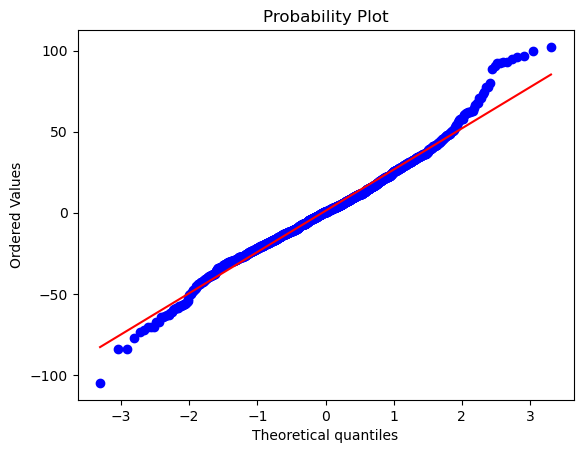

In [99]:
ss.probplot(residuals,dist="norm",plot=plt)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

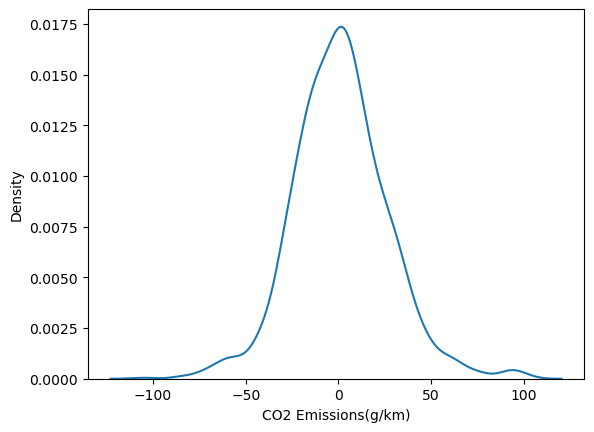

In [100]:
sns.kdeplot(residuals)

In [ ]:
# no auto corelation 

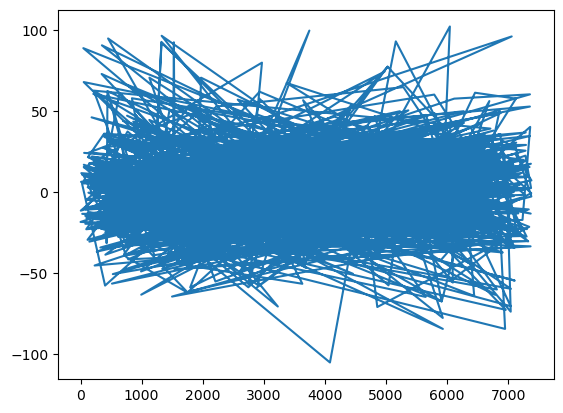

In [101]:
plt.plot(residuals)

<Axes: ylabel='CO2 Emissions(g/km)'>

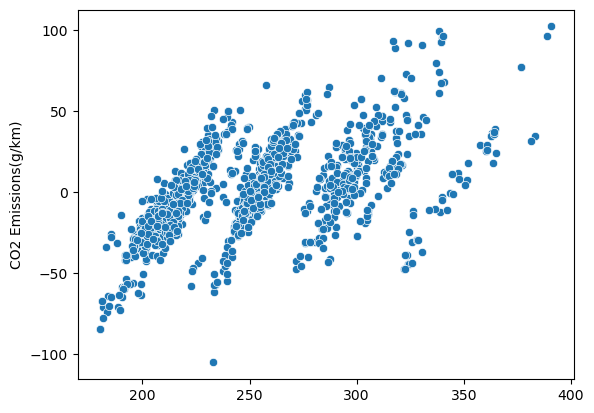

In [15]:
sns.scatterplot(x=pred,y=residuals)

In [109]:
df_num = df[['Engine Size(L)', 'Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]

In [110]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [111]:
df_num

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7380,2.0,4,9.4,219
7381,2.0,4,9.9,232
7382,2.0,4,10.3,240
7383,2.0,4,9.9,232


In [112]:
variance_inflation_factor(df_num,0)

40.46023054894252

In [113]:
variance_inflation_factor(df_num,1)

72.67058258020083

In [114]:
variance_inflation_factor(df_num,2)

101.51645654940143

In [115]:
variance_inflation_factor(df_num,3)

123.76694469278483

Text(0.5, 1.0, 'Train vs Test r2 linear regression')

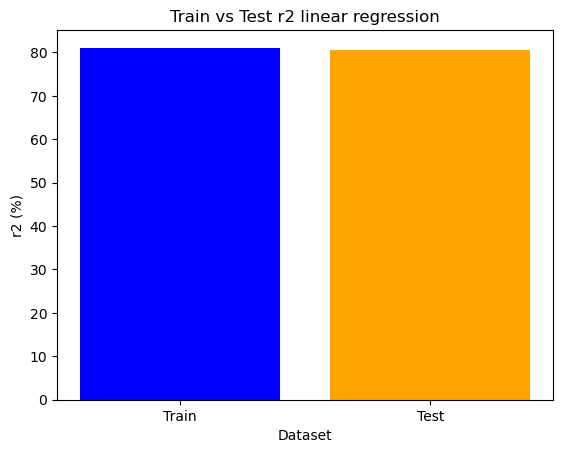

In [70]:
data = {
    'r2': [LRT_r2*100, LRTe_r2*100],
    'Dataset': ['Train', 'Test']
}

# Create a DataFrame
df1 = pd.DataFrame(data)
plt.bar(df1['Dataset'], df1['r2'], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('r2 (%)')
plt.title('Train vs Test r2 linear regression')

# svr

In [32]:
svr = SVR()

In [33]:
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'C': [0.1, 1, 10, 100],
          'gamma': ['scale', 'auto']}

In [34]:
grid_search = GridSearchCV(svr, params, cv=5,scoring='r2',return_train_score=True)

In [35]:
grid_search.fit(x_trainp,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='r2')

In [36]:
grid_search.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [47]:
SVRT_r2 = grid_search.best_score_
SVRT_r2

0.9919116202026668

# training

In [91]:
svm1 = SVR(kernel='rbf',gamma='scale',C=100)
model1 = svm1.fit(x_trainp,y_train)
preeed = model1.predict(x_trainp)
R2_scr_train = r2_score(y_train,preeed)
svr_mean2error_train  = mean_squared_error(y_train,preeed)

In [92]:
R2_scr_train

0.9989309932788524

In [93]:
svr_mean2error_train

3.671048735033288

# testing

In [77]:
svm = SVR(kernel='rbf',gamma='scale',C=100)
model = svm.fit(x_trainp,y_train)
preeed = model.predict(x_testp)
R2_scr = r2_score(y_test,preeed)
svr_mean2error  = mean_squared_error(y_test,preeed)

In [78]:
SVRTe_r2 = R2_scr
SVRTe_r2

0.9937994814384666

In [79]:
svr_mean2error

20.957737844429857

Text(0.5, 1.0, 'Train vs Test r2 linear svc')

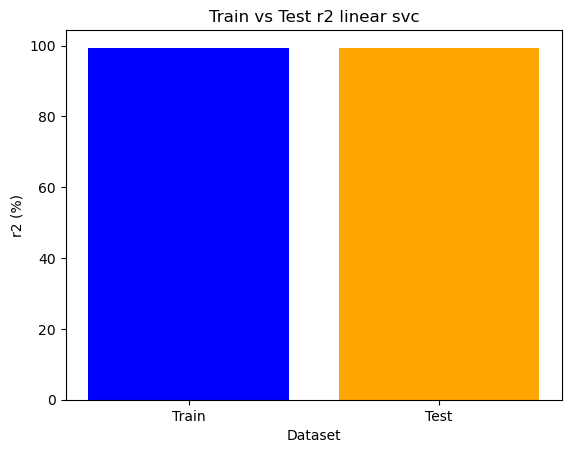

In [71]:
data = {
    'r2': [SVRT_r2*100, SVRTe_r2*100],
    'Dataset': ['Train', 'Test']
}

# Create a DataFrame
df1 = pd.DataFrame(data)
plt.bar(df1['Dataset'], df1['r2'], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('r2 (%)')
plt.title('Train vs Test r2 linear svc')

# model selection

Text(0.5, 1.0, 'all algorithms Test r2 score')

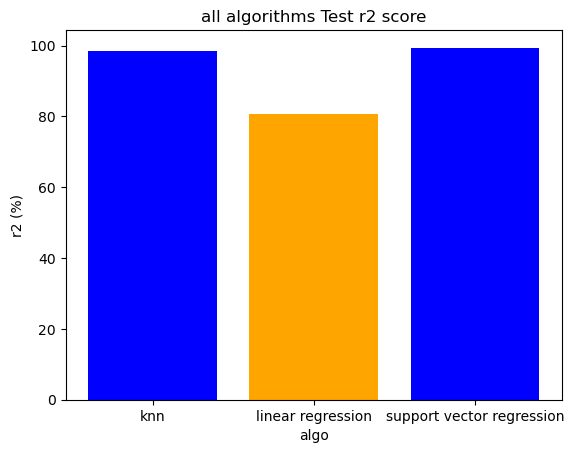

In [94]:
data = {
    'r2': [knnTe_r2*100,LRTe_r2*100, SVRTe_r2*100],
    'Dataset': ['knn', 'linear regression',"support vector regression"]
}

# Create a DataFrame
df1 = pd.DataFrame(data)
plt.bar(df1['Dataset'], df1['r2'], color=['blue', 'orange'])
plt.xlabel('algo')
plt.ylabel('r2 (%)')
plt.title('all algorithms Test r2 score')